In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import glob
import plotly.io as pio
from astropy.io import fits
import pandas as pd
os.chdir('/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns')
from isochrone_preprocessing_fns import *
from photmetry_catalog_preprocessing_fn import *
from plotting_fns import *

print(sns.__version__)
import matplotlib
print(matplotlib.__version__)
print(pd.__version__)

0.13.2
3.8.2
2.2.0


# PHAST

### - Make optical catalog - include F275W cols for UV band

In [ ]:
# phast_fits_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/4band-merged.fits'
phast_fits_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/phast-all-merged.fits'
output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phast_f475W_f814W_table.csv'
phast_df = make_optical_photmetry_from_hst_dataproduct(photmetry_catalog_filepath=phast_fits_filepath, output_csv_filepath=output_file)

Adding F475W and F814W columns to table
Save catalog to CSV


### Forground extinction correction and GST selection 

In [ ]:
# output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phast_f475W_f814W_table.csv'
phast_df = phast_reduce_optical_photmetry_table(photometry_fits_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/phast_f475W_f814W_table.csv', 
                                            output_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phast_table.csv')


/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns/photmetry_catalog_preprocessing_fn.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_df["f814w_vega_ecorr"] = catalog_df["f814w_vega"] + 0.596 * 0.17
/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns/photmetry_catalog_preprocessing_fn.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_df["f475w_vega_ecorr"] = catalog_df["f475w_vega"] + 1.212 * 0.17
/Users/mmckay/phd_projects/analysis_routine/code/photometry_

### -Interpolation

In [ ]:
catalog_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phast_table.csv'
isochrone_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/RGB_isochrone_tables/RGB_AGB_isochrone_table.csv'
output_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phast_rgb_agb_selection.csv'

interpolated_phast_rgb_agb = catalog_linear_interpolation(catalog_csv_filepath, 
                                                            isochrone_csv_filepath,
                                                            output_filepath, 
                                                            savefile=True)

Running LinearNDInterpolator
Dropping fill values if any 88430
Saving the photometry catalog with interpolated values as /Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phast_rgb_agb_selection.csv


### -RGB selection

Saved RGB selection to /Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phast_rgb_selection.csv
Saved CMD to /Users/mmckay/phd_projects/analysis_routine/FIGURES/phast_cmd_plot.jpeg


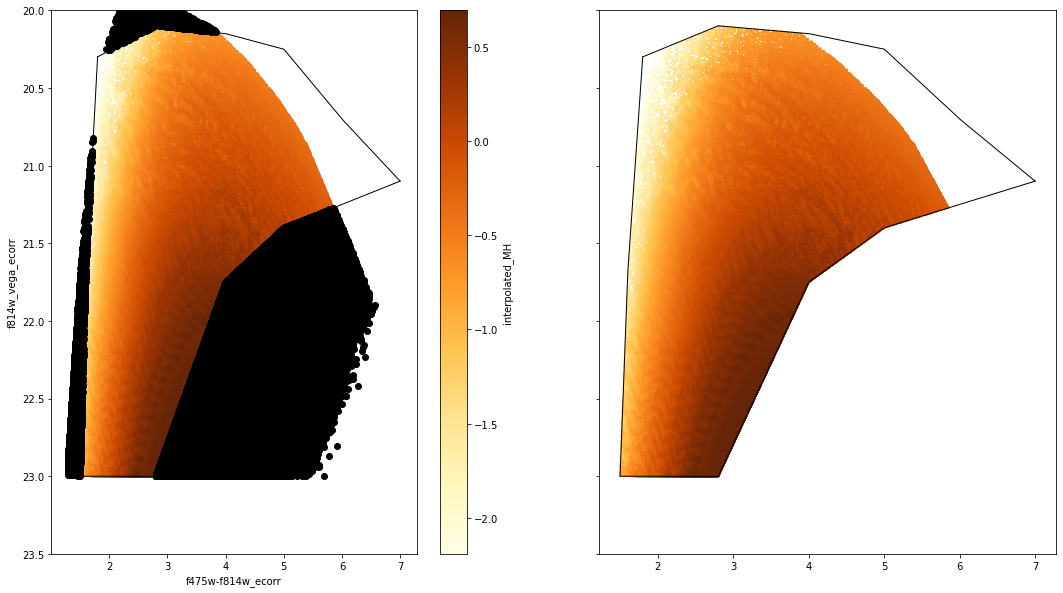

<Figure size 432x288 with 0 Axes>

In [ ]:
csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phast_rgb_agb_selection.csv'
f814w_col = 'f814w_vega_ecorr'
f475w_f814_col = 'f475w-f814w_ecorr'
z_col = 'interpolated_MH'
savefile_path = '/Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phast_rgb_selection.csv'
savefig_filepath = '/Users/mmckay/phd_projects/analysis_routine/FIGURES/phast_cmd_plot.jpeg'

plot_CMD(csv_filepath, f814w_col, f475w_f814_col, z_col, savefile=True, apply_phat_rgb_MH_selection=True, save_rgb_selection=True, save_filepath=savefile_path, savefig_filepath=savefig_filepath)

### Plot CMD MDF stellar density and median M/H

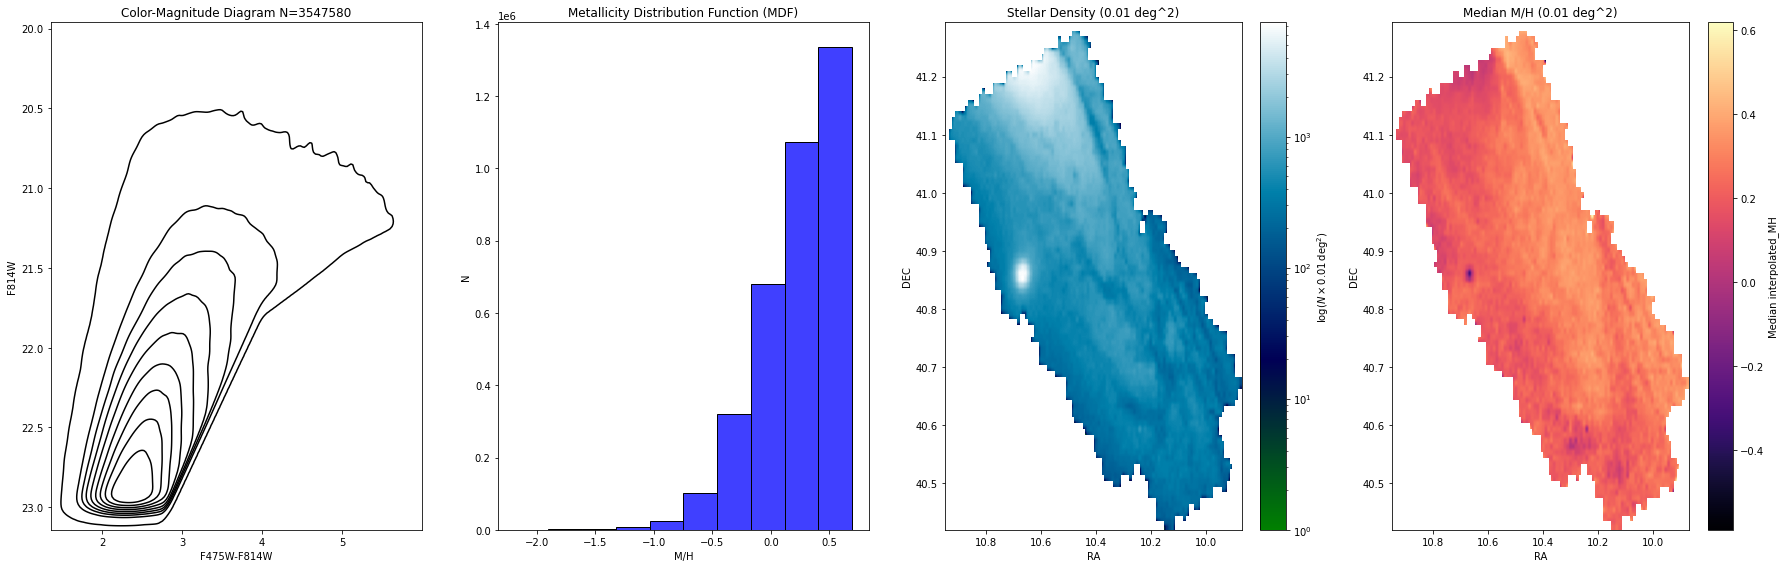

In [2]:
phast_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phast_rgb_selection.csv')
median_arr, stellar_density_arr = plot_cmd_mdf_spatial(phast_rgb_gregersen_selection_df, 
                     savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/phast_cmd_mdf_spatial_gregersen_box.jpeg', 
                     bin_size_deg=0.01, z_col='interpolated_MH')

# PHAT
- made on remote machine

In [ ]:
# phat_fits_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/hlsp_phat_hst_wfc3-uvis-acs-wfc-wfc3-ir_m33_f275w-f336w-f475w-f814w-f110w-f160w_v1_phot.fits'
# output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phat_f475W_f814W_table.csv'
# # phat_df = make_optical_photmetry_from_hst_dataproduct(photmetry_catalog_filepath=phat_fits_filepath, output_csv_filepath=output_file)
# make_optical_photmetry_from_hst_dataproduct(photmetry_catalog_filepath=phat_fits_filepath, output_csv_filepath=output_file)

In [2]:
# output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phat_f475W_f814W_table.csv'
phat_df = reduce_optical_photmetry_table(photometry_fits_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/phat_f475W_f814W_table.csv', 
                                            output_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phat_table.csv')


/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns/photmetry_catalog_preprocessing_fn.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_df["f814w_vega_ecorr"] = catalog_df["f814w_vega"] + 0.596 * 0.17
/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns/photmetry_catalog_preprocessing_fn.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_df["f475w_vega_ecorr"] = catalog_df["f475w_vega"] + 1.212 * 0.17
/Users/mmckay/phd_projects/analysis_routine/code/photometry_

### -Interpolation

In [3]:
catalog_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phat_table.csv'
isochrone_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/RGB_isochrone_tables/RGB_AGB_isochrone_table.csv'
output_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phat_rgb_agb_selection.csv'

interpolated_phat_rgb_agb = catalog_linear_interpolation(catalog_csv_filepath, 
                                                            isochrone_csv_filepath,
                                                            output_filepath, 
                                                            savefile=True)

Running LinearNDInterpolator
Dropping fill values if any 119381
Saving the photometry catalog with interpolated values as /Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phat_rgb_agb_selection.csv


Saved RGB selection to /Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phat_rgb_selection.csv
Saved CMD to /Users/mmckay/phd_projects/analysis_routine/FIGURES/phat_cmd_plot.jpeg


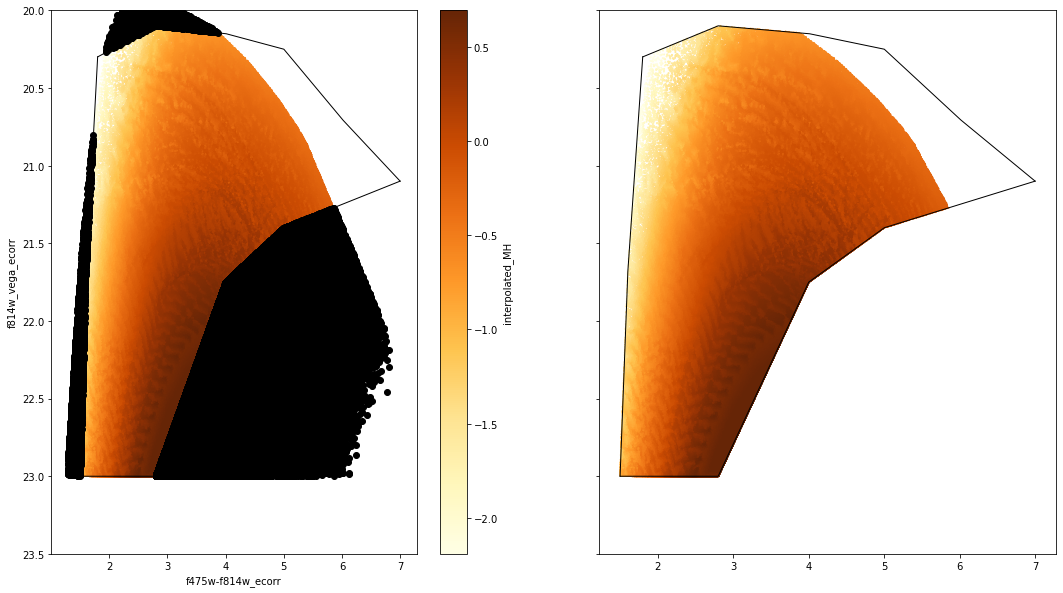

<Figure size 432x288 with 0 Axes>

In [4]:
csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phat_rgb_agb_selection.csv'
f814w_col = 'f814w_vega_ecorr'
f475w_f814_col = 'f475w-f814w_ecorr'
z_col = 'interpolated_MH'
savefile_path = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phat_rgb_agb_selection.csv'
savefig_filepath = '/Users/mmckay/phd_projects/analysis_routine/FIGURES/phat_cmd_plot.jpeg'

plot_CMD(csv_filepath, f814w_col, f475w_f814_col, z_col, savefile=True, apply_phat_rgb_MH_selection=True, save_rgb_selection=True, save_filepath=savefile_path, savefig_filepath=savefig_filepath)

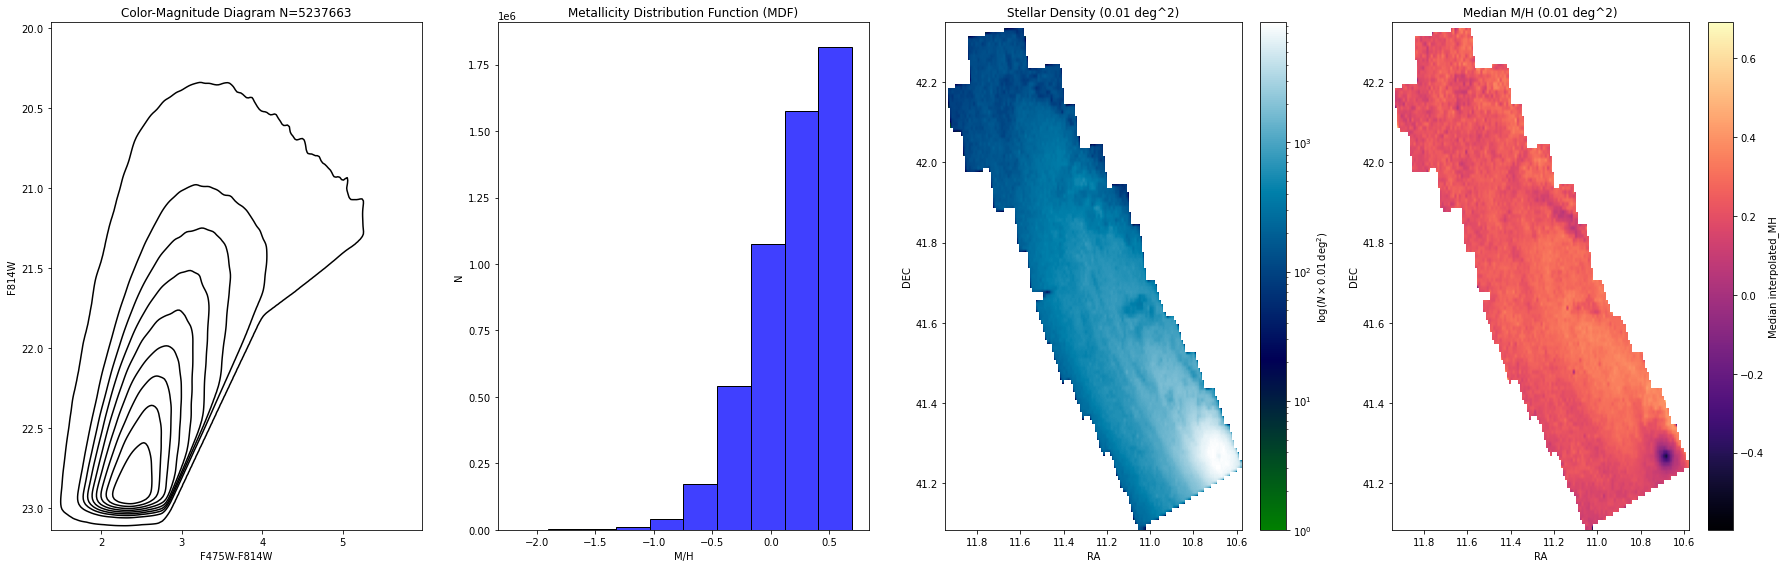

In [6]:
phat_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phat_rgb_agb_selection.csv')
median_arr, stellar_density_arr = plot_cmd_mdf_spatial(phat_rgb_gregersen_selection_df, 
                     savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/phat_cmd_mdf_spatial_gregersen_box.jpeg', 
                     bin_size_deg=0.01, z_col='interpolated_MH')

# PHATTER

In [ ]:
# phatter_hdu = fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/hlsp_phatter_hst_wfc3-uvis-acs-wfc-wfc3-ir_m33_f275w-f336w-f475w-f814w-f110w-f160w_v1_phot.fits')
# phatter_hdu.info()

In [ ]:
phatter_fits_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/hlsp_phatter_hst_wfc3-uvis-acs-wfc-wfc3-ir_m33_f275w-f336w-f475w-f814w-f110w-f160w_v1_phot.fits'
output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_f475W_f814W_table.csv'
phatter_df = make_optical_photmetry_from_hst_dataproduct(photmetry_catalog_filepath=phatter_fits_filepath, output_csv_filepath=output_file)

In [ ]:
output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_f475W_f814W_table.csv'
phatter_df = reduce_optical_photmetry_table(photometry_fits_filepath=output_file, 
                                            output_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phatter_table.csv')


In [ ]:
catalog_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phatter_table.csv'
isochrone_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_RGB_isochrone_tables/RGB_AGB_isochrone_table.csv'
output_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phatter_rgb_agb_selection.csv'

interpolated_phatter_rgb_agb = catalog_linear_interpolation(catalog_csv_filepath, 
                                                            isochrone_csv_filepath, 
                                                            output_filepath, 
                                                            savefile=True)

# M31 Mapping 
- combine PHAT and PHAST catalog

In [3]:
phat_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phat_rgb_agb_selection.csv')
phast_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phast_rgb_agb_selection.csv')

In [ ]:
# phat_ra_data = phat_df['ra']  # Replace with your RA data
# phat_dec_data = phat_df['dec']  # Replace with your Dec data
# phat_values_data = phat_df['interpolated_MH']  # Replace with your values data corresponding to each object
# phat_bin_size_deg = 0.01  # Choose your bin size in degrees

# phat_min_ra, phat_max_ra, phat_min_dec, phat_max_dec, phat_median_values = create_spatial_bins_and_median_optimized(phat_ra_data, phat_dec_data, phat_values_data, phat_bin_size_deg)


# phast_ra_data = phast_df['ra']  # Replace with your RA data
# phast_dec_data = phast_df['dec']  # Replace with your Dec data
# phast_values_data = phast_df['interpolated_MH']  # Replace with your values data corresponding to each object
# phast_bin_size_deg = 0.01  # Choose your bin size in degrees

# phast_min_ra, phast_max_ra, phast_min_dec, phast_max_dec, phast_median_values = create_spatial_bins_and_median_optimized(phast_ra_data, phast_dec_data, phast_values_data, phast_bin_size_deg)


In [4]:
m31_df = pd.concat([phat_df, phast_df], axis=0, ignore_index=True)
m31_df = m31_df.drop(columns=set(phat_df.columns) ^ set(phast_df.columns))
m31_df.shape
m31_df.to_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_m31_MH_catalog.csv', index=False)

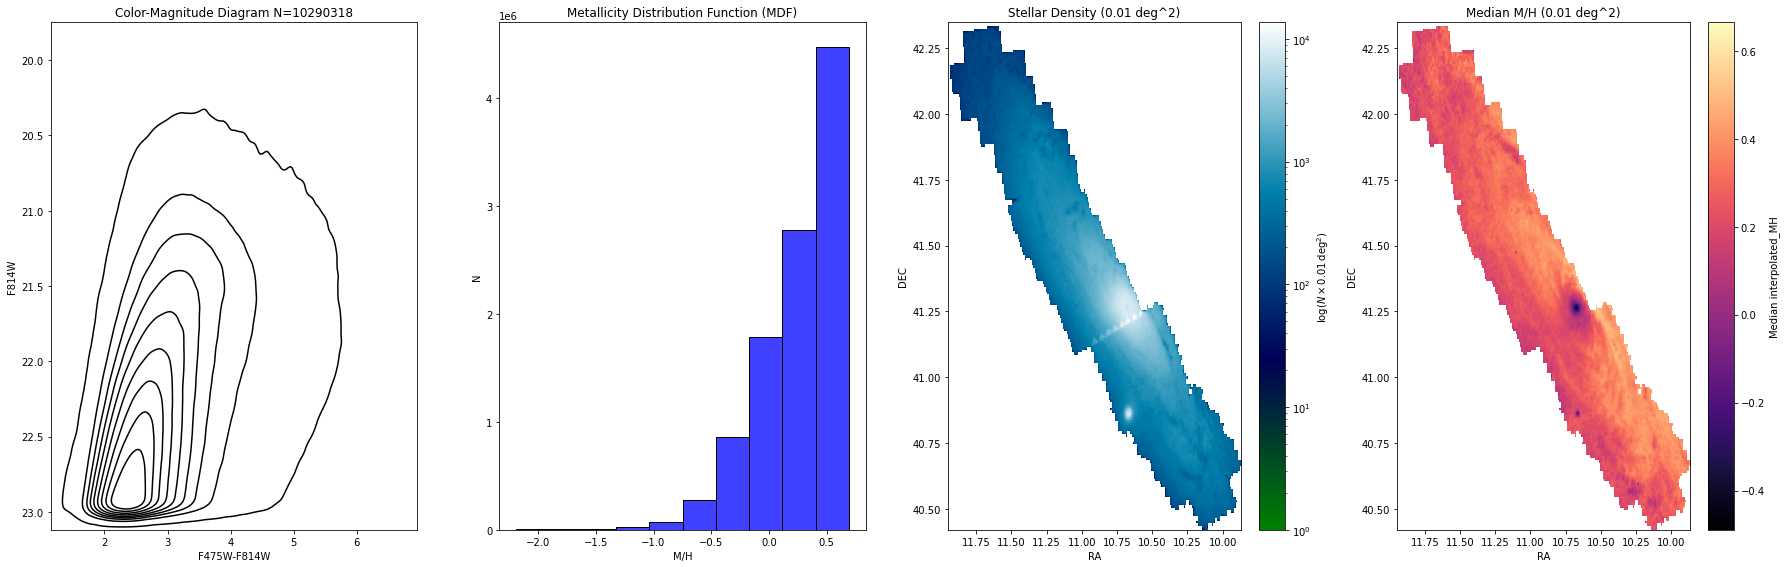

In [7]:
m31_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_m31_MH_catalog.csv')
median_arr, stellar_density_arr = plot_cmd_mdf_spatial(m31_rgb_gregersen_selection_df, 
                     savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_cmd_mdf_spatial_gregersen_box.jpeg', 
                     bin_size_deg=0.01, z_col='interpolated_MH')

In [ ]:
m31_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_m31_MH_catalog.csv')
median_arr, stellar_density_arr = plot_cmd_mdf_spatial(m31_rgb_gregersen_selection_df, 
                     savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_0001deg_cmd_mdf_spatial_gregersen_box.jpeg', 
                     bin_size_deg=0.0001, z_col='interpolated_MH')

In [ ]:
m31_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_m31_MH_catalog.csv')
median_arr, stellar_density_arr = plot_cmd_mdf_spatial(m31_rgb_gregersen_selection_df, 
                     savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_F814W_0001deg_cmd_mdf_spatial_gregersen_box.jpeg', 
                     bin_size_deg=0.0001, z_col='f814w_vega')

In [ ]:
# # Bin MH spatially
# m31_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_m31_MH_catalog.csv')
# bin_size_deg = 0.01
# m31_min_ra, m31_max_ra, m31_min_dec, m31_max_dec, m31_median_values, m31_sum_values, m31_bin_counts_nonzero, = create_spatial_bins_and_median_optimized(m31_df.ra, m31_df.dec, m31_df.interpolated_MH, bin_size_deg)


In [ ]:
# plt.figure(figsize=(15,10))
# plt.imshow(m31_median_values.T, origin='lower', extent=[m31_min_ra, m31_max_ra, m31_min_dec, m31_max_dec], cmap='magma', vmin=-0.3, vmax=0.5, label=f'M31 {len(m31_median_values)}')
# plt.colorbar(label='[M/H] Median')
# plt.xlabel('RA')
# plt.ylabel('Dec')
# plt.title(f'Spatial Bin = {bin_size_deg}')
# plt.legend()
# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_MH_spatial_bins.jpg', format='jpeg')
# plt.show()

In [8]:
m31_rgb_gregersen_selection_df.columns

Index(['Unnamed: 0', 'ra', 'dec', 'f475w_vega', 'f475w_snr', 'f475w_crowd',
       'f475w_sharp', 'f475w_flag', 'f814w_vega', 'f814w_snr', 'f814w_crowd',
       'f814w_sharp', 'f814w_flag', 'f814w_vega_ecorr', 'f475w_vega_ecorr',
       'f475w-f814w_ecorr', 'interpolated_MH', 'interpolated_Mini',
       'interpolated_int_IMF', 'interpolated_Mass', 'interpolated_logL',
       'interpolated_logTe', 'interpolated_logg'],
      dtype='object')